In [187]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

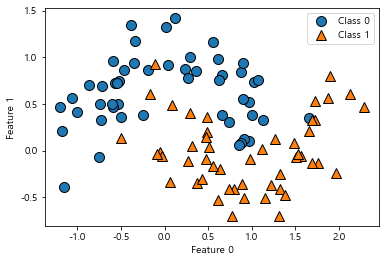

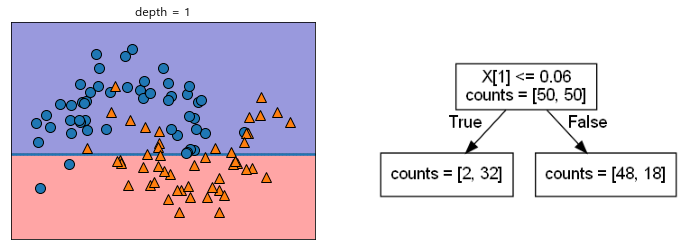

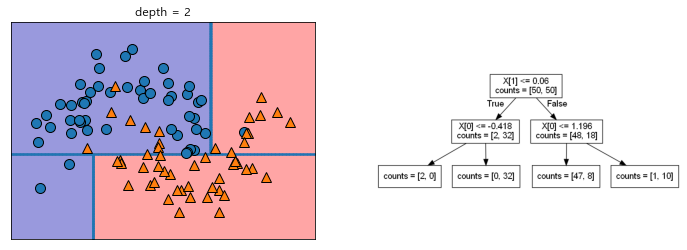

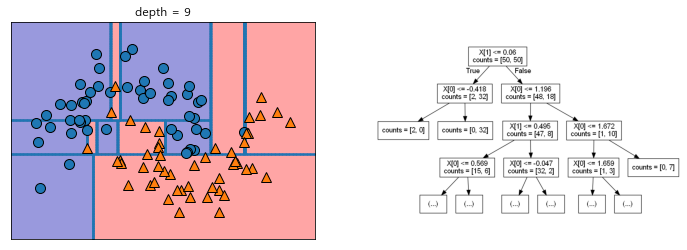

In [188]:
mglearn.plots.plot_tree_progressive()

### 데이터 불러오기

In [189]:
cancer = load_breast_cancer()

### test/train split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

### 모델 선언

In [191]:
model = DecisionTreeClassifier(random_state= 0)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

### 정확도 확인

In [192]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8811188811188811


### HyperParameter 적용

In [193]:
# max_depth
model = DecisionTreeClassifier(max_depth=4,random_state= 0)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [194]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9929577464788732
0.9020979020979021


In [195]:
# max_leaf_nodes =
model = DecisionTreeClassifier(max_leaf_nodes= 8,max_depth=4,random_state= 0)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, random_state=0)

In [196]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9788732394366197
0.951048951048951


In [197]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

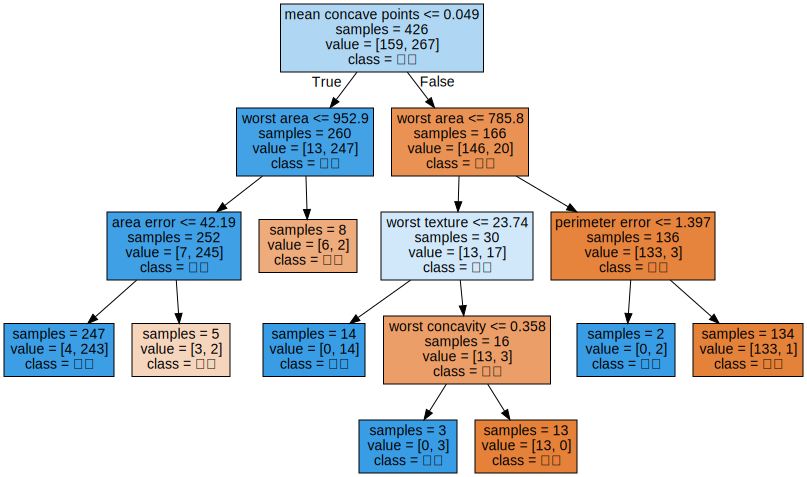

In [198]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [199]:
#.feature_importances_: 각 피쳐들의 중요도를 상대 수치로 확인하는 명령어
model.feature_importances_


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.75754333, 0.        , 0.        ,
       0.        , 0.        , 0.02109471, 0.01815043, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05356208, 0.        , 0.12316271, 0.        ,
       0.        , 0.02648674, 0.        , 0.        , 0.        ])

### 중요도 시각화

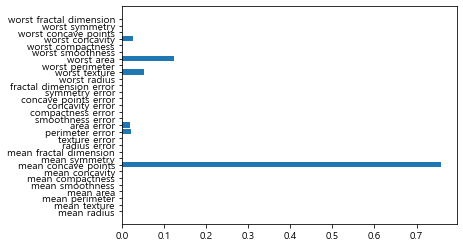

In [200]:
xlable= cancer["feature_names"]
plt.barh(cancer["feature_names"],model.feature_importances_ )
plt.show()

# 회귀모델

In [201]:
import os

In [202]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

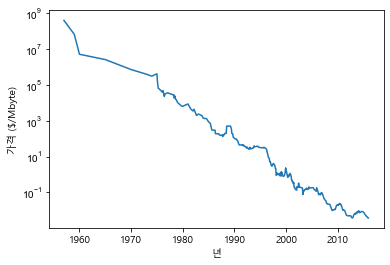

In [203]:
plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [205]:
train = ram_prices[ram_prices["date"]<2000]
test = ram_prices[ram_prices["date"]>=2000]

In [206]:
# 스케일링
ram_prices["price"].apply(lambda x : np.log(x))

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
328    -5.403678
329    -5.449140
330    -5.472671
331    -5.572754
332    -5.599422
Name: price, Length: 333, dtype: float64

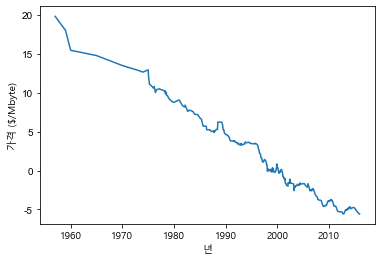

In [207]:
plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.plot(ram_prices.date, ram_prices["price"].apply(lambda x : np.log(x)))
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [208]:
X_train = train["date"].to_numpy()[:, np.newaxis]
y_train = train["price"].apply(lambda x : np.log(x))
X_test = test["date"].to_numpy()[:, np.newaxis]
y_test = test["price"].apply(lambda x : np.log(x))

In [209]:
tree_model = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)
linear_model = LinearRegression()

tree_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

LinearRegression()

In [210]:
X = ram_prices["date"].to_numpy()[:, np.newaxis]
y = ram_prices["price"].apply(lambda x : np.log(x))

In [211]:
pred_tree = tree_model.predict(X)
pred_linear = linear_model.predict(X)

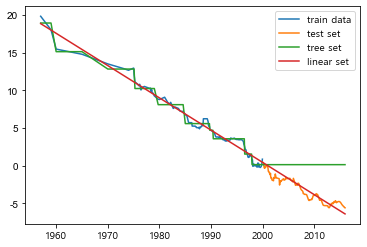

In [212]:
plt.yticks(fontname = "Arial")
plt.plot(X_train, y_train, label = "train data")
plt.plot(X_test, y_test, label = "test set")
plt.plot(X, pred_tree, label = "tree set")
plt.plot(X, pred_linear, label = "linear set")
plt.legend()
plt.show()
# tree의 과대적합을 보여주는 예시...